<a href="https://colab.research.google.com/github/priyankajonnalagadda/Crypto-volatility-risk-analyzer/blob/main/crypto_volatility_team_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance pandas numpy matplotlib --quiet


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


In [3]:
coins = ["BTC-USD", "ETH-USD", "SOL-USD"]

raw = yf.download(
    coins,
    period="1y",
    interval="1d",
    group_by="ticker",
    progress=False
)

raw.head()


/tmp/ipython-input-702633869.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SOL-USD']: OperationalError('database is locked')


Ticker     SOL-USD                                        BTC-USD  \
Price         Open High Low Close Adj Close Volume           Open   
Date                                                                
2025-01-24     NaN  NaN NaN   NaN       NaN    NaN  103965.671875   
2025-01-25     NaN  NaN NaN   NaN       NaN    NaN  104824.031250   
2025-01-26     NaN  NaN NaN   NaN       NaN    NaN  104713.210938   
2025-01-27     NaN  NaN NaN   NaN       NaN    NaN  102680.304688   
2025-01-28     NaN  NaN NaN   NaN       NaN    NaN  102095.414062   

Ticker                                                                \
Price                High            Low          Close       Volume   
Date                                                                   
2025-01-24  107098.546875  102772.125000  104819.484375  52388229265   
2025-01-25  105243.789062  104120.375000  104714.648438  23888996502   
2025-01-26  105438.648438  102507.710938  102682.500000  22543395879   
2025-01-27  103214.109375   97795.937500  102087.687500  89006608428   
2025-01-28  103730.820312  100238.187500  101332.476562  47180685494   

Ticker          ETH-USD                                                      
Price              Open         High          Low        Close       Volume  
Date                                                                         
2025-01-24  3334.808350  3424.899902  3277.323242  3309.554932  25578325671  
2025-01-25  3309.711670  3349.298340  3270.273193  3317.269531  13744316078  
2025-01-26  3317.291504  3359.312500  3233.922119  3236.134277  14471528757  
2025-01-27  3235.855225  3250.396484  3024.091553  3178.920410  39412486482  
2025-01-28  3179.086914  3222.737305  3040.092285  3077.112549  20718206194

In [4]:
frames = []

for coin in coins:
    df = raw[coin].copy()
    df.reset_index(inplace=True)
    df["Coin"] = coin.replace("-USD", "")
    frames.append(df)

crypto_df = pd.concat(frames, ignore_index=True)

crypto_df = crypto_df[["Date", "Open", "High", "Low", "Close", "Volume", "Coin"]]

crypto_df.head()


Price,Date,Open,High,Low,Close,Volume,Coin
0,2025-01-24,103965.671875,107098.546875,102772.125000,104819.484375,5.238823e+10,BTC
1,2025-01-25,104824.031250,105243.789062,104120.375000,104714.648438,2.388900e+10,BTC
2,2025-01-26,104713.210938,105438.648438,102507.710938,102682.500000,2.254340e+10,BTC
3,2025-01-27,102680.304688,103214.109375,97795.937500,102087.687500,8.900661e+10,BTC
4,2025-01-28,102095.414062,103730.820312,100238.187500,101332.476562,4.718069e+10,BTC


In [5]:
crypto_df["Daily_Return"] = crypto_df.groupby("Coin")["Close"].pct_change()
crypto_df.dropna(inplace=True)

crypto_df.head()


/tmp/ipython-input-4240533383.py:1: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  crypto_df["Daily_Return"] = crypto_df.groupby("Coin")["Close"].pct_change()


Price,Date,Open,High,Low,Close,Volume,Coin,Daily_Return
1,2025-01-25,104824.031250,105243.789062,104120.375000,104714.648438,2.388900e+10,BTC,-0.001000
2,2025-01-26,104713.210938,105438.648438,102507.710938,102682.500000,2.254340e+10,BTC,-0.019407
3,2025-01-27,102680.304688,103214.109375,97795.937500,102087.687500,8.900661e+10,BTC,-0.005793
4,2025-01-28,102095.414062,103730.820312,100238.187500,101332.476562,4.718069e+10,BTC,-0.007398
5,2025-01-29,101317.523438,104750.804688,101283.820312,103703.210938,4.743205e+10,BTC,0.023396


In [6]:
crypto_df["Volatility"] = (
    crypto_df.groupby("Coin")["Daily_Return"]
    .rolling(window=7)
    .std()
    .reset_index(level=0, drop=True)
)

crypto_df.dropna(inplace=True)
crypto_df.head()


Price,Date,Open,High,Low,Close,Volume,Coin,Daily_Return,Volatility
7,2025-01-31,104737.562500,106026.351562,101543.882812,102405.023438,4.573276e+10,BTC,-0.022249,0.015995
8,2025-02-01,102402.796875,102755.726562,100297.710938,100655.906250,2.775794e+10,BTC,-0.017080,0.016760
9,2025-02-02,100661.539062,101430.664062,96216.078125,97688.976562,6.309182e+10,BTC,-0.029476,0.018494
10,2025-02-03,97681.101562,102514.171875,91242.890625,101405.421875,1.154009e+11,BTC,0.038044,0.025169
11,2025-02-04,101398.718750,101745.617188,96208.109375,97871.820312,7.300213e+10,BTC,-0.034846,0.028328


In [7]:
crypto_df["Volatility_Level"] = pd.qcut(
    crypto_df["Volatility"],
    q=3,
    labels=["Low", "Medium", "High"]
)

crypto_df["Volatility_Level"].value_counts()


,count
Volatility_Level,
Low,240
High,240
Medium,238


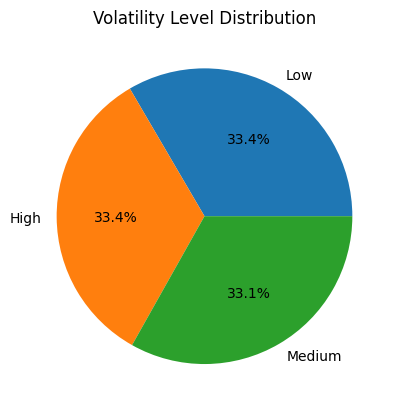

In [8]:
counts = crypto_df["Volatility_Level"].value_counts()

plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.title("Volatility Level Distribution")
plt.show()


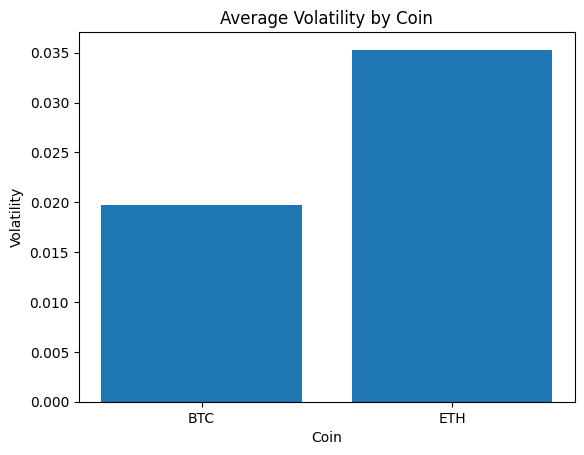

In [9]:
avg_vol = crypto_df.groupby("Coin")["Volatility"].mean()

plt.bar(avg_vol.index, avg_vol.values)
plt.title("Average Volatility by Coin")
plt.xlabel("Coin")
plt.ylabel("Volatility")
plt.show()


In [10]:
summary = crypto_df.groupby("Coin").agg(
    Avg_Volatility=("Volatility", "mean"),
    Max_Volatility=("Volatility", "max"),
    High_Vol_Days=("Volatility_Level", lambda x: (x == "High").sum())
)

summary


,Avg_Volatility,Max_Volatility,High_Vol_Days
Coin,,,
BTC,0.019697,0.057774,41
ETH,0.035296,0.088404,199


In [11]:
# Normalize volatility into 0–100 risk score
v_min = crypto_df["Volatility"].min()
v_max = crypto_df["Volatility"].max()

crypto_df["Risk_Score"] = (
    (crypto_df["Volatility"] - v_min) / (v_max - v_min) * 100
)

# Risk category
def risk_category(score):
    if score < 33:
        return "Low Risk"
    elif score < 66:
        return "Medium Risk"
    else:
        return "High Risk"

crypto_df["Risk_Category"] = crypto_df["Risk_Score"].apply(risk_category)

crypto_df[["Coin", "Volatility", "Risk_Score", "Risk_Category"]].head()


Price,Coin,Volatility,Risk_Score,Risk_Category
7,BTC,0.015995,12.683604,Low Risk
8,BTC,0.016760,13.606644,Low Risk
9,BTC,0.018494,15.697394,Low Risk
10,BTC,0.025169,23.745975,Low Risk
11,BTC,0.028328,27.556076,Low Risk


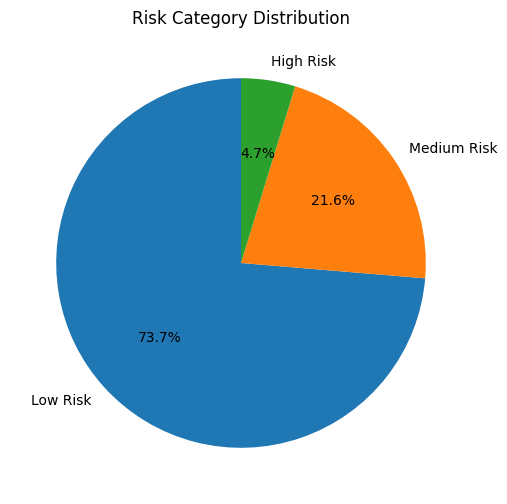

In [12]:
risk_counts = crypto_df["Risk_Category"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    risk_counts.values,
    labels=risk_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Risk Category Distribution")
plt.show()


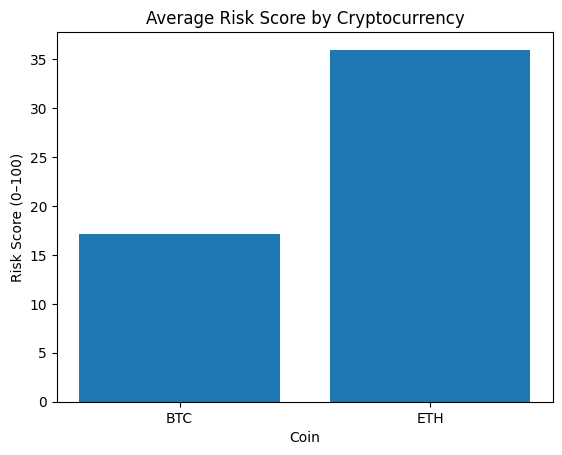

In [13]:
avg_risk = crypto_df.groupby("Coin")["Risk_Score"].mean()

plt.figure()
plt.bar(avg_risk.index, avg_risk.values)
plt.title("Average Risk Score by Cryptocurrency")
plt.xlabel("Coin")
plt.ylabel("Risk Score (0–100)")
plt.show()


In [14]:
final_summary = crypto_df.groupby("Coin").agg(
    Avg_Volatility=("Volatility", "mean"),
    Avg_Risk_Score=("Risk_Score", "mean"),
    Dominant_Risk=("Risk_Category", lambda x: x.mode()[0])
).reset_index()

final_summary


,Coin,Avg_Volatility,Avg_Risk_Score,Dominant_Risk
0,BTC,0.019697,17.148198,Low Risk
1,ETH,0.035296,35.958790,Low Risk
